# Introduction to Gaussian Processes

-----

In this notebook, we explore how to effectively use Gaussian Processes. A Gaussian Process is a powerful probabilistic technique that constrains a covariance function of the training data features to generate a model representation of the data. This technique naturally supports the estimation of a model and confidence intervals that can guide the application of the model. In this notebook, we introduce Gaussian Processes, and demonstrate their application to both classification and regression tasks by using the implementations in the scikit learn library. 

Note, that mathematics behind Gaussian processes can seem complex. We will focus on the application of Gaussian processes, and emphasize their application as opposed to their theory. 

-----

## Table of Contents

[Formalism](#Formalism)
- [Kernel Functions](#Kernel-Functions)

[Gaussian Processes: Classification](#Gaussian-Processes:-Classification)

- [Classification: Iris Data](#Classification:-Iris-Data)
- [Gaussian Processes: Decision Surface](#Gaussian-Processes:-Decision-Surface)
- [Gaussian Processes: Hyperparameters](#Gaussian-Processes:-Hyperparameters)
- [Classification: Adult Data](#Classification:-Adult-Data)

[Gaussian Processes: Regression](#Gaussian-Processes:-Regression)

- [Regression: Auto MPG Data](#Regression:-Auto-MPG-Data)

-----

Before proceeding with the _Formalism_ section of this Notebook, we first have our standard notebook setup code.

-----

In [1]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

sns.set_style('white')

-----

[[Back to TOC]](#Table-of-Contents)

## Formalism

Gaussian Processes are based on the concept of modeling data via an infinite collection of random variables, over which we marginalize out uninteresting variables to leave a probabilistic model of those of interest. This modeling process in general involves a _mean function_ and a _covariance function_, which is related to how a Gaussian distribution is defined by its mean and standard deviation. The covariance extends the standard deviation to multiple dimensions, where we can have measures of variation within a dimension, which is the variance, and variation between dimensions, which is the covariance.

When working with Gaussian processes in the scikit learn library, the mean function is generally left as zero, which is similar to having the normal distribution zero-centered, and the covariance function defines the relationship between the features. The covariance function is modeled by using a **kernel** function. As more observations (or instances in a training data set) are added to the Gaussian Process, the model is increasingly constrained. The model build by this estimator is probabilistic, which provides both an estimate and a confidence interval.

This process is demonstrated in the following Code cell, where we first generate an interesting, one-dimensional data set. Next we define the region of interest and a list of that holds the number of observation points. We use the helper function `make_gp_plot`, which creates a Gaussian Process regression estimator, creates a sample of observation points (where the number of points is defined by the relevant value in the `num_x_obs` list), fits this estimator to the data provided, and generates a plot of the original function, the regression model from the Gaussian process, the sample points, and the 95% confidence interval.

The following figures demonstrate how as the number of sample points is increased (from 2 to 4 to 8 to 12) the regression model becomes more tightly constrained as does he confidence interval. Notice how when only two sample points are provided, the model is only constrained at the ends, and the confidence interval is quite wide, indicating little is known in the middle region. As the number of points is increased, the fit is constrained at additional points, which forces the regression model to be more constrained. Furthermore, the confidence interval collapses at the sample points and becomes larger between them, demonstrating that the uncertainty in the model increases in these regions. This is a direct result of the probabilistic nature of this algorithm.

-----

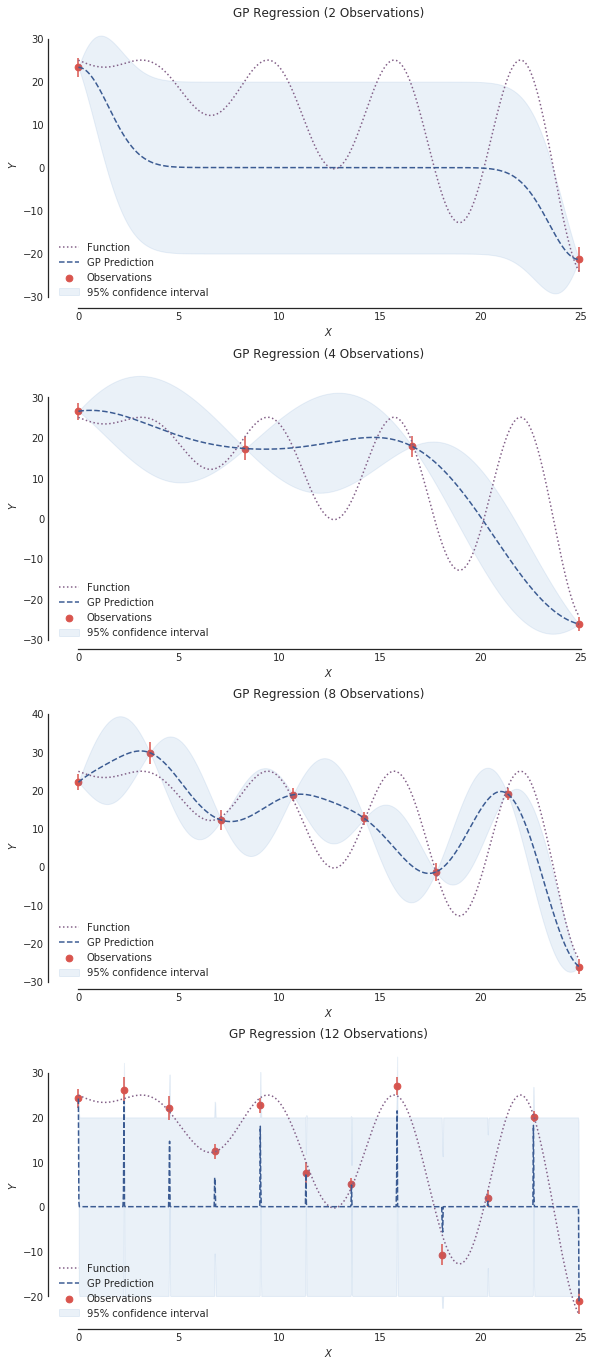

In [2]:
from helper_code import gp as gp

# Function of interest
def the_function(x):
    return 25 - x * np.cos(x) - x

# Number of x observations, and x-axis region of interst
x_low = 0.01
x_high = 24.9
num_x_obs = [2, 4, 8, 12]

# Create figure area
fig, axs = plt.subplots(figsize=(10, 6 * len(num_x_obs)), 
                        nrows=len(num_x_obs), ncols=1, 
                        sharex=False)

# Iterate through different neighbor counts
for idx, x in enumerate(num_x_obs):
    gp.make_gp_plot(axs[idx], x_low, x_high, x, the_function) 

-----
[[Back to TOC]](#Table-of-Contents)

### Kernel Functions

A key aspect of a Gaussian process is the covariance function, which in the scikit learn library is known as a kernel function. The scikit learn library provides a number of kernel functions that can be used to model the covariance in a training data set. These kernel functions can be used on their own, or combined to create more complex functional relationships. Some of the more useful kernels include:

- [ConstantKernel][skck] is used, as part of a Product kernel, to scale another kernel function in magnitude.
- [Sum][sks] is used to add two kernel functions to make a new kernel.
- [Product][skp] is used to multiply two kernel functions to make a new kernel.
- [White Kernel][skw] models, as part of a Sum kernel, the noise part of a signal.
- [Radial Basis Function Kernel][skrbf] is a stand-alone kernel that models the covariance function of a data set as a squared exponential, with a key hyperparameter being the length-scale, `l`.
- [Matern kernel][skmk] is a generalization of the RBF kernel, with an additional smoothing hyperparameter.

For additional details of these, and other kernels in the scikit learn library, refer to the [kernel online][skk] documentation.

-----

[skck]: http://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.ConstantKernel.html
[sks]: http://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.Sum.html
[skp]: http://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.Product.html
[skw]: http://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.WhiteKernel.html
[skrbf]: http://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.RBF.html
[skmk]: http://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.Matern.html
[skk]: http://scikit-learn.org/stable/modules/gaussian_process.html#basic-kernels

[[Back to TOC]](#Table-of-Contents)

## Gaussian Processes: Classification

With the previous introduction to Gaussian Processes, we can apply this algorithm to classification tasks. To do this we will use the [`GaussianProcessClassifier`][skgpc] estimator from the scikit-learn `gaussian_process` module. This estimator will construct, by default, a Gaussian process from a training data set. This estimator accepts a number of hyperparameters including:

- `kernel` : the kernel function to use to model the covariance of the training features.
- `optimizer`: the optimizer technique to determine the best parameters for the selected kernel.

To demonstrate using a aussian process with the scikit-learn library, we will first load in the Iris data. With these data, we will construct a Gaussian process to perform classification before looking at the decision surface for a Gaussian Process, which is kernel dependent, when applied to the Iris data. After this, we will explore the impact of different kernel functions on the Gaussian process estimator by examining how the decision surface changes as different kernel functions are used for the classification task. Finally, we will switch to a larger data set to learn how Gaussian processes can classify more complex data.

----
[skgpc]: http://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessClassifier.html

[[Back to TOC]](#Table-of-Contents)

### Classification:  Iris Data

We now apply the Gaussian Process algorithm to the Iris data to create a classification model. The basic approach is simple, and follows the standard scikit-learn estimator philosophy:

1. Import the proper module, `gaussian_process`.
2. Create the estimator, [`GaussianProcessClassifier`][skgpc] and specify the appropriate hyperparameters. For the Gaussian process, we can accept the defaults, or specify values for specific hyperparameters such as `kernel`. Note, if no kernel is specified, a simple radial basis function kernel is used.
3. Fit the model to the training data, note that by using our simple `get_iris_data` helper function we have loaded the Iris data, split the data into training and testing sets, and scaled all data by first normalizing the training data.
4. Predict new classes with our trained model (or in the simple demonstration below, generate a performance metric via the `score` method).

These steps are demonstrated in the following Code cell, where we obtain our data, and show the distribution, create our estimator, fit the estimator to our training data, and generate a performance score on the testing data. 

-----
[skgpc]: http://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessClassifier.html

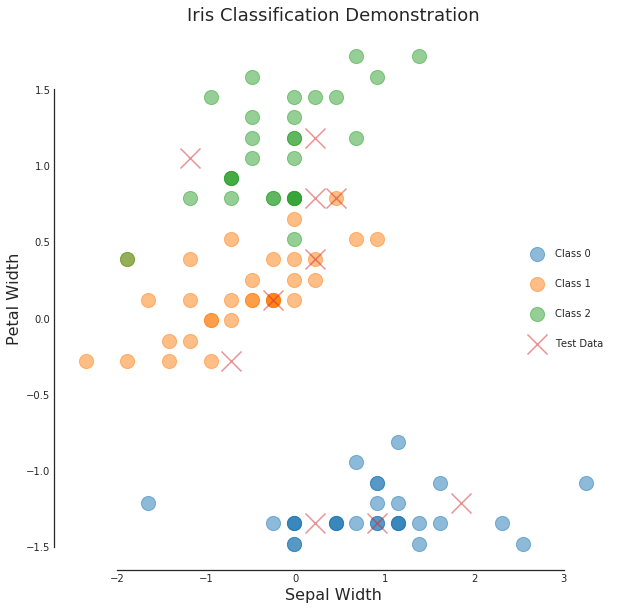

In [3]:
from helper_code import iris as hi

# Amount to hold out for 'blind' testing
test_frac = 0.4

# Show the 'Train' and 'Test' data plot.
show_plot = True

# Split data into training and testing
# Note that we have both 'data' and 'labels'
d_train_sc, d_test_sc, l_train, l_test = \
    hi.get_iris_data(test_frac, show_plot)

In [4]:
from sklearn.gaussian_process import GaussianProcessClassifier
# First we construct our Gaussian Process, we only specify the 
# random_state hyperparameter to ensure reproduceability.
gpc = GaussianProcessClassifier(random_state=23)

# Fit estimator to scaled training data
gpc = gpc.fit(d_train_sc, l_train)

# Compute and display accuracy score
score = 100.0 * gpc.score(d_test_sc, l_test)
print(f"Gaussian Process prediction accuracy = {score:5.1f}%")

Gaussian Process prediction accuracy =  95.0%


-----

In the following two Code cells, we compute and display the classification report and the confusion matrix. These two performance measurements provide additional insight into the performance of this algorithm, which even with the default values provides reasonable performance.

-----

In [5]:
from sklearn.metrics import classification_report

# Thre types of Iris in data set
labels = ['Setosa', 'Versicolor', 'Virginica']

# Predict on test data and report scores
y_pred = gpc.predict(d_test_sc)
print(classification_report(l_test, y_pred, \
                            target_names = labels))

             precision    recall  f1-score   support

     Setosa       1.00      1.00      1.00        21
 Versicolor       0.86      1.00      0.92        18
  Virginica       1.00      0.86      0.92        21

avg / total       0.96      0.95      0.95        60



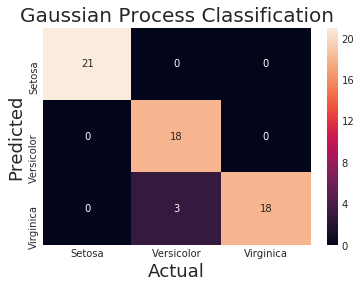

In [6]:
from helper_code import mlplots as ml

# Call confusion matrix plotting routine
ml.confusion(l_test.reshape(l_test.shape[0]), 
             y_pred, labels, 3, 
             'Gaussian Process Classification')

-----

[[Back to TOC]](#Table-of-Contents)

### Gaussian Processes:  Decision Surface

Visualizations provide unique insight into models and their performance on training data. In previous notebooks, we have used a visualization of the decision surface to understand how different classifiers perform on the same data. We demonstrate constructing a decision surface in the following Code cell by using several helper methods. First, we need to reduce our data set down to two dimensions to make the decision surface visualization. This step is accomplished by the `trim_data` helper function, which takes our training features and labels and returns a two-dimensional array that holds two features: Sepal Width and Petal Width, along with the classification. Next, we generate a two-dimensional mesh grid along these two dimensions. 

We compute a best fit Gaussian process to the trimmed two-dimensional data (we could fit on the full data, but in this example we use only the two dimensions used in the plot), and use this model to predict classification both on the test data and on the mesh grid to construct the decision surface. Finally, we generate a scatter plot of these data, and color the underlying mesh appropriately by the predicted class for that cell. As the decision surface below demonstrates, this default Gaussian process separates the classes with non-linear, curved cuts.

-----

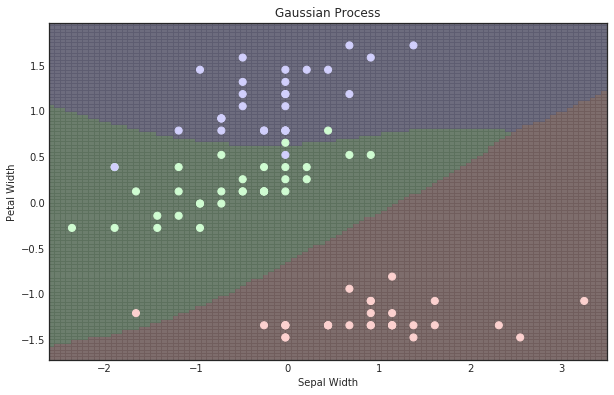

In [7]:
# Make a two-dimensional Iris data set
n_data = hi.trim_data(d_train_sc, l_train)

# Construct mesh grid data
mdata = hi.get_mdata(n_data)

fig, ax = plt.subplots(figsize=(10,8))

# Now train our model
gpc.fit(n_data[:,:2], n_data[:,2])
    
# Predict for mesh grid
z = gpc.predict(mdata)
    
# Plot training data and mesh grid
hi.splot_data(ax, n_data, mdata, z,
              'Sepal Width', 'Petal Width', 50)
    
ax.set_title(f'Gaussian Process') ;

-----

[[Back to TOC]](#Table-of-Contents)

### Gaussian Processes: Hyperparameters

The primary hyperparameter for a Gaussian process is `kernel`, which specifies the kernel function used to model the covariance between these features in the training data. The full set of hyperparameters is available from the estimator's online documentation. To understand the impact of a hyperparameter, beyond simply computing performance metrics for different hyperparameter values, we construct and compare decisions surfaces.

In the following Code cell, we generate five different decision surfaces, corresponding to  different kernels. The first kernel is an isotropic, or symmetric radial basis function, with a `length_scale` parameter value of `0.1`. The second kernel is an anisotropic, or asymmetric radial basis function, with two different `length-scale` values that provide the asymmetry (note, we have two terms for the asymmetry since we have two features that we are fitting). The third kernel is a rational quadratic function, which is a sum of different radial basis function kernels each with a different `length_scale`. The fourth kernel is the product of constant kernel with a dot product kernel, which is invariant under rotations. The final kernel is a Matern kernel, which is a generalization of the radial basis function with a smoothing parameter.  


As the following figures demonstrate, the decision surfaces are all very different, often with non-linear class divisions. One obvious exception is the anisotropic radial basis function kernel, which has multiple linear cuts. These decision surfaces demonstrate the ability of the Gaussian process to model complex class divisions, and provide some insight into their popularity. Note that in all cases, the Gaussian process was fit to only the sepal width and petal width features.

----

[skdtc]: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

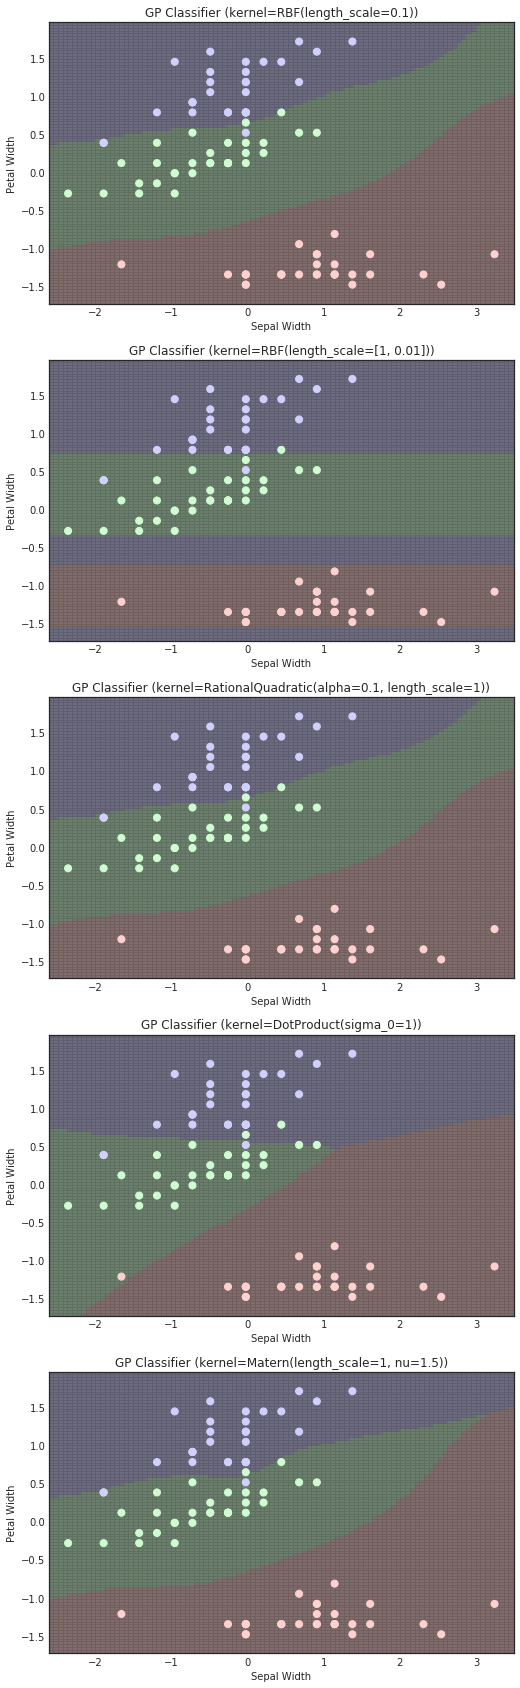

In [8]:
from sklearn.gaussian_process.kernels import RBF, \
                                             DotProduct, \
                                             ConstantKernel, \
                                             RationalQuadratic, \
                                             Matern

# Define boundary region
bnds = [0.01, 10.0]

# Define kernels
kernels = [1.0 * RBF(length_scale=0.1,
                     length_scale_bounds=bnds),
           1.0 * RBF(length_scale=[1.0, 0.01], 
                     length_scale_bounds=bnds),
           1.0 * RationalQuadratic(1.0, alpha=0.1),
           ConstantKernel(0.1, constant_value_bounds=bnds)
           * DotProduct(sigma_0=1.0, sigma_0_bounds=bnds),
           1.0 * Matern(length_scale=1.0, length_scale_bounds=bnds)]

# Show the mesh grid and training data
fig, axs = plt.subplots(figsize=(10,6 * len(kernels)), 
                        nrows=len(kernels), ncols=1, 
                        sharex=False)

# Iterate through different neighbor counts
for idx, k in enumerate(kernels):
    
    # Now train our model
    gpc.set_params(kernel=k, random_state=23)
    
    # Now train our model
    gpc.fit(n_data[:,:2], n_data[:,2])
    
    # Predict for mesh grid
    z = gpc.predict(mdata)
    
    # Plot training data and mesh grid
    hi.splot_data(axs[idx], n_data, mdata, z, 
                  'Sepal Width', 'Petal Width', 50)
    
    axs[idx].set_title(f'GP Classifier (kernel={k.k2})')

-----

As the previous figures demonstrate, the different kernel functions can generate vastly different decision surfaces, and as a result, different classifications for a complex data set. We now choose one kernel function, an anisotropic radial basis function, and explore how changing one parameter for this kernel function impacts the corresponding decision surface. 

In the following Code cell, we create three different RBF kernels, with anisotropic `length_scale` values of `[0.2, 0.05]`, `[0.05, 0.02]`, and `[0.02, 0.04]`. We iterate through these three kernels, creating a new Gaussian process, fitting this model to the training data, and generating a new decision surface for each kernel. As the resulting figures demonstrate, even a single kernel with different parameters can produce drastically different decision surfaces. 

As the length scales shrink, the kernel becomes more sensitive to the fluctuations in the training data, which is small. The first decision surface resembles the original decision surface for our Gaussian process. The middle figure appears to have several linear cuts defining the classifications. The final decision surface is extremely choppy, with many linear cuts dividing the space into complex classification boundaries. This demonstrates how it is important to both pick a thoughtful kernel function, as well as its parameters, when employing a Gaussian process model.

-----

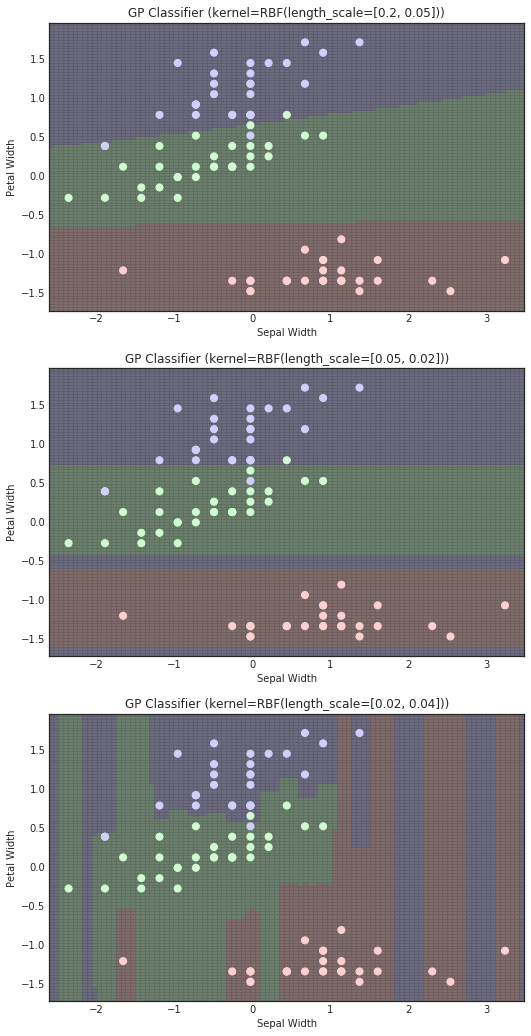

In [9]:
from sklearn.gaussian_process.kernels import RBF

# Use anisotropic RBF, change length_scale hyperparameters
kernels = [1.0 * RBF([0.2, 0.05]),
           1.0 * RBF([0.05, 0.02]),
           1.0 * RBF([0.02, 0.04])]

# Show the mesh grid and training data
fig, axs = plt.subplots(figsize=(10,6 * len(kernels)), 
                        nrows=len(kernels), ncols=1, 
                        sharex=False)

# Iterate through different neighbor counts
for idx, k in enumerate(kernels):
    
    # Now train our model
    gpc.set_params(kernel=k, random_state=23)
    
    # Now train our model
    gpc.fit(n_data[:,:2], n_data[:,2])
    
    # Predict for mesh grid
    z = gpc.predict(mdata)
    
    # Plot training data and mesh grid
    hi.splot_data(axs[idx], n_data, mdata, z, 
                  'Sepal Width', 'Petal Width', 50)
    
    axs[idx].set_title(f'GP Classifier (kernel={k.k2})')

-----

<font color='red' size = '5'> Student Exercise </font>

In the previous Code cell, we generated decision surfaces for three different anisotropic RBF kernel functions in a Gaussian process. Return to the previous Code cell and make the following changes. What did you learn from the new decision surfaces?

2. Change the anisotropic kernel `length_scale` parameter values, for example, try `[2, 1]`, `[1, 0.5]`, or `[0.04, 0.02]`, or make up other values. 
3. Try using a different kernel, such as an isotropic RBF kernel, or a Matern kernel, both of which were demonstrated earlier.

-----


[[Back to TOC]](#Table-of-Contents)

## Classification: Adult Data

We now turn to a more complex data set with which to demonstrate classification by using a Gaussian process. The data we use for this is the [Adult income prediction task][uciad], which has been documented in other notebooks (e.g., the _Introduction to Decision Trees_ notebook). These data consist of the following features: age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, and salary. The last column, salary, is discrete and contains one of two strings to indicate if the salary was below or above $50,000. This is the column we will use to make our label.

In the following two Code cells, we first build a full path and file name for where this data will be stored locally. Next, we check to see if the data is already available locally, and if not, we use the `wget` command to pull the data from the UCI machine learning repository for local analysis. 

-----
[uciad]: https://archive.ics.uci.edu/ml/datasets/Adult

In [10]:
# Adult data file from UCI ML Repository
# http://archive.ics.uci.edu/ml/machine-learning-databases/adult/

# First we find our HOME directory
tmp = !echo $HOME

# Second we construct the full path, below our 
# HOME directory to file location
data_file=tmp[0] + '/work/data/adult.data'

In [11]:
%%bash -s "$data_file"

# Note, we passed in a Python variable above to the Bash script 
# which is then accessed via positional parameter, or $1 in this case.

# First test if file of interest does not exist
if [ ! -f "$1" ] ; then

# If it does not exist, we grab the file from the Internet and
# store it locally in the data directory

wget -O "$1" http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

else
    
    echo "File already exists locally."
fi

File already exists locally.



-----

Now that the _adult data_ has been stored locally, we can read the data into a DataFrame and extract our label column and our feature array. Creating the target label array is complicated since the label contains one of two strings. We map a function to generate a boolean value based on the content of this string to create our desired binary classification problem. Finally, we randomly sample five instances from the feature array to verify our data pre-processing has been successful.

-----

In [12]:
# Adult data archived at UCI ML Repository

col_names = ['Age', 'Workclass', 'FNLWGT', 'Education', 
             'EducationLevel', 'MaritalStatus', 'Occupation', 
             'Relationship', 'Race', 'Sex', 'CapitalGain', 'CapitalLoss', 
             'HoursPerWeek', 'NativeCountry', 'Salary']

# Read CSV data from URL return Pandas
adult_data = pd.read_csv(data_file, index_col=False, names = col_names)

# Create label column, one for >50K, zero otherwise.
labels = adult_data['Salary'].map(lambda x : 1 if '>50K' in x else 0)

# Now we can drop the original column
adult_data = adult_data.drop('Salary', axis=1)

#categorical = ['Education', 'Workclass', 'Race', 'Sex', 'Occupation', 'Relationship', 'NativeCountry']
#cat_data = pd.get_dummies(adult_data[categorical])

numerical = ['Age', 'EducationLevel', 'HoursPerWeek', 'CapitalGain', 'CapitalLoss']
num_data = adult_data[numerical]

features = num_data
features.sample(5)

,Age,EducationLevel,HoursPerWeek,CapitalGain,CapitalLoss
24733,23,10,40,0,0
24740,53,9,40,0,0
9274,59,13,40,0,0
23589,54,13,45,0,0
5634,51,14,50,0,0


-----

With our feature and label data prepared, we are now ready to begin the machine learning process. In the following two Code cells we first create our decision tree classifier, and then measure its performance on our training data. In the first Code cell, we start by splitting our data into training and testing samples. Since we have over 30,000 instances in our data set, to avoid straining this Gaussian process, we use an extreme split where 95% of our data is used for testing and only 5% for training. In part this is due to computational complexity, as the size of the training data grows, the complexity of fitting the kernel function to the feature covariance becomes challenging (e.g., traditional values for _training:testing_ splits will likely crash the kernel in your notebook since the memory will be exhausted). 

Next, we create the `GaussianProcessClassifier` estimator. The only hyperparameter that we specify at this time is  `random_state` in order to ensure reproducibility. We could, of course, specify parameters to the default RBF kernel used in this classification process, or, alternatively, provide a different kernel function. Finally, we fit this estimator to our training data, and generate an accuracy score on our test data. 

In the second Code cell, we compute and display a simple accuracy score before generating and displaying the full classification report. Note that, even with this basic RBF kernel with limited training data, our Gaussian process classifier performs well, easily beating the zero model and other classification algorithms. In addition, the report indicates that our model performs worst in predicting the positive class. Specifically, the recall indicates that we incorrectly label positive targets as negative. This means that our classifier incorrectly labels individuals who do earn a high salary as being in the low salary category. This could prove problematic, for example, if we are seeking to target high wage earners in a marketing campaign.


----

In [13]:
from sklearn.model_selection import train_test_split

frac = 0.95
d_train, d_test, l_train, l_test = \
    train_test_split(features, labels,
                     test_size=frac, random_state=23)

adult_model = GaussianProcessClassifier(random_state=23)

adult_model = adult_model.fit(d_train, l_train)

In [14]:
from sklearn.metrics import accuracy_score

predicted = adult_model.predict(features)

# Classify test data and display score and report
score = 100.0 * accuracy_score(labels, predicted)
print(f'Decision Tree Classification [Adult Data] Score = {score:4.1f}%\n')
print('Classification Report:\n {0}\n'.format(
    classification_report(labels, predicted)))

Decision Tree Classification [Adult Data] Score = 81.6%

Classification Report:
              precision    recall  f1-score   support

          0       0.85      0.92      0.88     24720
          1       0.67      0.47      0.55      7841

avg / total       0.80      0.82      0.80     32561




-----

<font color='red' size = '5'> Student Exercise </font>

In the previous Code cells, we constructed a Gaussian process for classification and applied it to the adult income prediction task. The initial result was reasonable, but try making the following changes to see if you can do better.

2. Change the features used in the classification, for example drop one or more columns, such as native country. Do the results change? 
3. Try using different kernels, such as an anisotropic RBF kernel and a Matern kernel.
4. Try changing the `random_state` hyperparameter.

-----

[[Back to TOC]](#Table-of-Contents)

## Gaussian Processes: Regression

A Gaussian process can be used to perform regression. In fact, this is the most natural application of a Gaussian process since we use the data to constrain the covariance function of the features to model the continuous process from which the data were sampled. To perform regression with the scikit-learn library we employ the [`GaussianProcessRegressor`][skgpr] estimator in the `gaussian_process` module. This estimator employs the same set of hyperparameters as the `GaussianProcessClassifier` estimator, and is, therefore, used in a similar manner. One point, which is common for many of the scikit learn estimators, by specifying the `random_state` hyperparameter, we ensure reproducibility. This is because every time a Gaussian process is constructed, centers for the kernel function are randomly generated.

In this section we employ Gaussian process to perform regression on the automotive fuel performance prediction data. First, we will briefly introduce these data, and prepare them for the regression task. We will employ the patsy module to use a regression formula to create our dependent and independent feature matrices. Finally, we will construct a decision tree regressor on these data and evaluate its performance.


-----

[skgpr]: http://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html


[[Back to TOC]](#Table-of-Contents)

### Regression: Auto MPG Data

The [automobile fuel performance prediction data][uciap] were collated by Ross Quinlan and released in 1993. The data contains nine features: mpg, cylinders, displacement, horsepower, weight, acceleration, model year, origin, and car name. Of these, the first is generally treated as the dependent variable (i.e., we wish to predict the fuel efficiency of the cars), while the next seven features are generally used as the independent variables. The last feature is a string that is unlikely to be useful when predicting on new, unseen data, and is, therefore, not included in our analysis.

Of these features, three are discrete: cylinders, year, and origin, and four are continuous: 
displacement, horsepower, weight, and acceleration. In the first two Code cells, we first construct the local path and file name for this data, before checking to see if this data file exists locally. If not, we use the `wget` command to pull the data from the UCI ML repository.

----
[uciap]: https://archive.ics.uci.edu/ml/datasets/auto+mpg

In [15]:
# Auto MPG data file from UCI ML Repository
# https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/

# Second we construct the full path, below our 
# HOME directory to file location
data_file=tmp[0] + '/work/data/auto-mpg.data'

In [16]:
%%bash -s "$data_file"

# Note, we passed in a Python variable above to the Bash script 
# which is then accessed via positional parameter, or $1 in this case.

# First test if file of interest does not exist
if [ ! -f "$1" ] ; then

# If it does not exist, we grab the file from the Internet and
# store it locally in the data directory

wget -O "$1" https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

else
    
    echo "File already exists locally."
fi

File already exists locally.


-----

With the data stored locally, we can now create our feature DataFrame, pre-process the data, and extract our dependent and independent arrays. First we read the data from the local file into a DataFrame. Next, the `Horsepower` feature has several rows with missing data. Since this is encoded by using a `?`, we first convert this character to a `nan` value, which we can then use to quickly drop any row with missing data. In the end, this removes six rows, but ensures that the `Horsepower` feature is continuous, which will improve our regression model.

Next, we extract the dependent array, which is `MPG`. Finally, we extract out the independent array, which is all of the features except `MPG`. At this point, we randomly sample the independent array to ensure the data are ready for Gaussian process regression.

-----

In [17]:
# Names for our columns
col_names = ['MPG', 'Cylinders', 'Displacement',
             'Horsepower', 'Weight', 'Acceleration', 
             'Year', 'Origin', 'Name']

# Create DataFrame and sample the result
auto_data = pd.read_csv(data_file, index_col=False, names = col_names, 
                  delim_whitespace=True)

# Define our regression features
features = auto_data[['MPG', 'Displacement', 'Weight', 'Acceleration']]

# Now identify and drop rows with missing values.
features['Horsepower'] = auto_data.Horsepower.map(lambda x : np.nan if '?' in x else float(x)) 
features.dropna(axis=0, how='any', inplace=True)

# Define our labels (y) anbd features (x)

y = features.MPG
x = features.drop('MPG', axis=1)

x.sample(5)

,Displacement,Weight,Acceleration,Horsepower
348,89.0,2050.0,17.3,62.0
98,250.0,3278.0,18.0,100.0
131,71.0,1836.0,21.0,65.0
42,383.0,4955.0,11.5,180.0
33,232.0,2634.0,13.0,100.0


-----

With the data prepared, we now perform Gaussian process regression. For this task, we will employ the sum of a Matern kernel for the signal with a White Kernel for the noise. We provide basic parameter values for these input kernel functions (changing these and seeing the impact is a good way to learn how Gaussian process regression is actually performed). Next, we divide the arrays so that 60% of our data is used for training and 40% of our data for testing. 

We create our `GaussianProcessRegressor` estimator with the specified kernel, fit the model to the data, and compute a basic performance score. The second Code cell computes additional performance metrics, which demonstrate that this initial approach performs reasonably well, but leaves room for improvement.

-----

In [18]:
from sklearn.gaussian_process import  GaussianProcessRegressor

# Import our kernels
from sklearn.gaussian_process.kernels import Matern, WhiteKernel

# Amount held out for testing
frac = 0.4

# Split data intro training:testing data set
ind_train, ind_test, dep_train, dep_test = \
    train_test_split(x, y, test_size=frac, random_state=23)

# Define custom kernel (Matern + noise)
krnl = 1. + Matern(length_scale=1, nu=1.5) + WhiteKernel(noise_level=10)

# Create Regressor with specified properties
auto_model = GaussianProcessRegressor(kernel=krnl, random_state=23)

# Fit estimator and display score
auto_model = auto_model.fit(ind_train, dep_train)
print('Score = {:.1%}'.format(auto_model.score(ind_test, dep_test)))

Score = 63.2%


In [19]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

# Regress on test data
pred = auto_model.predict(ind_test)

# Copute performance metrics
mae = mean_absolute_error(dep_test, pred)
mse = mean_squared_error(dep_test, pred)
mbe = median_absolute_error(dep_test, pred)
mr2 = r2_score(dep_test, pred)

ev_score = explained_variance_score(dep_test, pred)

# Display metrics
print(f'Mean Absolute Error   = {mae:4.2f}')
print(f'Mean Squared Error    = {mse:4.2f}')
print(f'Median Absolute Error = {mbe:4.2f}')
print(f'R^2 Score             = {mr2:5.3f}')
print(f'Explained Variance    = {ev_score:5.3f}')

Mean Absolute Error   = 3.43
Mean Squared Error    = 18.83
Median Absolute Error = 2.93
R^2 Score             = 0.632
Explained Variance    = 0.647


-----

<font color='red' size = '5'> Student Exercise </font>

In the previous Code cells, we constructed a Gaussian process for regression and applied it to the automobile fuel performance prediction task. The initial result was reasonable, but try making the following changes to see if you can do better.

2. Change the features used in the regression, for example add in one or more categorical features. Do the results change? 
3. Try using different kernel parameter values, such as the input to either the Matern kernel or the White kernel.
4. Try using a different kernel, like anisotropic RBF (you also might have to vary the `length_scale` parameter to achieve better performance).

-----



## Ancillary Information

The following links are to additional documentation that you might find helpful in learning this material. Reading these web-accessible documents is completely optional.

4. The standard reference for Gaussian Processes is the [Gaussian Processes for Machine Learning][1] book by Rasmussen and Williams.
2. Wikipedia maintains a nice [article][2] on Gaussian processes.
1. A nice [blog article][3] discussing Gaussian Processes from scratch in Python.


-----

[1]: http://www.gaussianprocess.org/gpml/
[2]: https://en.wikipedia.org/wiki/Gaussian_process
[3]: http://natelemoine.com/gaussian-processes-for-machine-learning-in-python-1/

**&copy; 2017: Robert J. Brunner at the University of Illinois.**

This notebook is released under the [Creative Commons license CC BY-NC-SA 4.0][ll]. Any reproduction, adaptation, distribution, dissemination or making available of this notebook for commercial use is not allowed unless authorized in writing by the copyright holder.

[ll]: https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode